In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats =np.random.uniform(low=-90.000,high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs =zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import the request library
import requests

#Import the API key
from config import weather_api_key

#Import the datetime module from the datetime library
from datetime import datetime
from citipy import citipy 

In [5]:
# Create a list for holdimg the cities.
cities =[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If the city is unique, then we will ad it to the cities list.
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count.
len(cities)
    

618

In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b8151fed7ab23e8b1e13bb9325a0f3b3


In [7]:
# Create an empty list to hold the weather data.
city_data =[]
#print the beginning of the logging
print("Begining Data Retrieval        ")
print("--------------------------------")

#Create counters
record_count = 1
set_count =1

#Loop through all the cities in our list
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50== 0 and i >=50):
        set_count +=1
        record_count =1
    # Create endpoint URL with each city
    city_url =url + "&q=" + "i"
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i >=50):
        set_count +=1
        record_count =1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count +=1 
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
    
    # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    #Appnd the city information into city_data list.
        city_data.append({"city": city.title(),
                    "Country": city_country,
                    "Date": city_date,
                     "Lat": city_lat,
                     "Lng":city_lng,
                     "Max Temp": city_max_temp,
                     "Humidity": city_humidity,
                     "Cloudiness": city_clouds,
                     "Wind Speed":city_wind})
    
    #If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data loading is complete.
    print("-------------------------------")
    print("Data Retrieval Complete        ")
    print("-------------------------------")
    


Begining Data Retrieval        
--------------------------------
processing Record 1 of Set 13 | port alfred
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 2 of Set 13 | qaanaaq
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 3 of Set 13 | dovolnoye
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 4 of Set 13 | ushuaia
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 5 of Set 13 | atuona
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 6 of Set 13 | butaritari
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 7 of Set 13 | tuktoyaktuk
-------------------------------
Data Retrieval Complete        
---

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 11 of Set 14 | yellowknife
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 12 of Set 14 | tandalti
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 13 of Set 14 | hasaki
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 14 of Set 14 | ribeira grande
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 15 of Set 14 | koshurnikovo
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 16 of Set 14 | winnemucca
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 17 of Set 14 | vikhorevka
-------------------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 20 of Set 15 | muros
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 21 of Set 15 | digby
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 22 of Set 15 | buchanan
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 23 of Set 15 | provideniya
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 24 of Set 15 | chokurdakh
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 25 of Set 15 | ahipara
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 26 of Set 15 | mitsamiouli
-------------------------------
D

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 29 of Set 16 | castro
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 30 of Set 16 | cururupu
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 31 of Set 16 | sayyan
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 32 of Set 16 | merrill
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 33 of Set 16 | lagoa
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 34 of Set 16 | lolua
City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 35 of Set 16 | bocana de paiwas
---------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 38 of Set 17 | kaitangata
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 39 of Set 17 | dingle
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 40 of Set 17 | guarapari
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 41 of Set 17 | cayenne
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 42 of Set 17 | les cayes
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 43 of Set 17 | kamenskoye
City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 44 of Set 17 | martapura
--

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 47 of Set 18 | kuusamo
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 48 of Set 18 | ugoofaaru
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 49 of Set 18 | florianopolis
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 50 of Set 18 | filingue
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 1 of Set 19 | half moon bay
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 2 of Set 19 | severo-kurilsk
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 3 of Set 19 | am timan
---------------------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 5 of Set 20 | silale
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 6 of Set 20 | veraval
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 7 of Set 20 | richards bay
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 8 of Set 20 | mitla
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 9 of Set 20 | alyangula
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 10 of Set 20 | oktyabrskiy
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 11 of Set 20 | santa catarina de tepehuanes
-----------------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 14 of Set 21 | gazli
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 15 of Set 21 | kota bahru
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 16 of Set 21 | qaqortoq
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 17 of Set 21 | nemuro
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 18 of Set 21 | tiarei
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 19 of Set 21 | mrirt
City not found. Skipping...
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 20 of Set 21 | srednekolymsk
---------

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 23 of Set 22 | bay city
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 24 of Set 22 | barcelos
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 25 of Set 22 | wanning
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 26 of Set 22 | kupang
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 27 of Set 22 | zhucheng
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 28 of Set 22 | gimbi
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 29 of Set 22 | lazarev
-------------------------------
Data Retr

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 33 of Set 23 | bunia
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 34 of Set 23 | tafalla
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 35 of Set 23 | pinega
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 36 of Set 23 | gat
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 37 of Set 23 | bridlington
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 38 of Set 23 | arlit
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 39 of Set 23 | smolenka
-------------------------------
Data Retrieva

-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 42 of Set 24 | severnoye
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 43 of Set 24 | nelson bay
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 44 of Set 24 | royan
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 45 of Set 24 | osakarovka
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 46 of Set 24 | gwadar
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 47 of Set 24 | jieshi
-------------------------------
Data Retrieval Complete        
-------------------------------
processing Record 48 of Set 24 | dorfen
-------------------------------
Data R

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,city,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2020-10-06 13:54:40,-33.59,26.89,69.10,76,67,7.94
1,Qaanaaq,GL,2020-10-06 13:46:03,77.48,-69.36,15.94,82,7,9.01
2,Dovolnoye,RU,2020-10-06 13:54:41,54.50,79.67,37.09,76,100,11.77
3,Ushuaia,AR,2020-10-06 13:42:34,-54.80,-68.30,39.20,80,75,24.16
4,Atuona,PF,2020-10-06 13:54:41,-9.80,-139.03,77.54,74,51,17.45
5,Butaritari,KI,2020-10-06 13:45:33,3.07,172.79,81.82,76,0,14.61
6,Tuktoyaktuk,CA,2020-10-06 13:45:21,69.45,-133.04,33.80,100,90,21.92
7,Busselton,AU,2020-10-06 13:45:20,-33.65,115.33,48.99,57,97,5.41
8,Mar Del Plata,AR,2020-10-06 13:45:16,-38.00,-57.56,55.99,93,40,8.05
9,Arraial Do Cabo,BR,2020-10-06 13:54:41,-22.97,-42.03,86.00,62,34,6.93


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into CSV

city_data_df.to_csv(output_data_file,index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [43]:
# Import the time module
import time
# Get today's date in seconds.
today = time.time()
today

1601993877.3789408

In [44]:
today = time.strftime("%x")
today

'10/06/20'

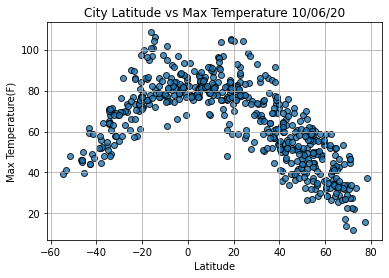

In [45]:
# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
           max_temps, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

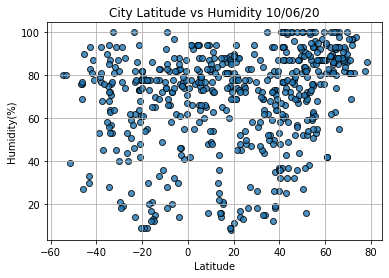

In [46]:
# Build the scatter plot for latitude vs Humidity.
plt.scatter(lats,
           humidity, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

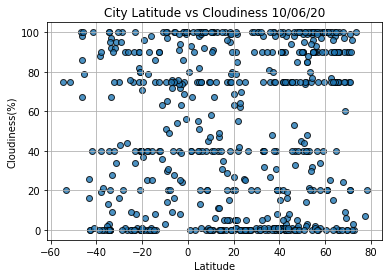

In [47]:
# Build the scatter plot for latitude vs Cloudiness.
plt.scatter(lats,
           cloudiness, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

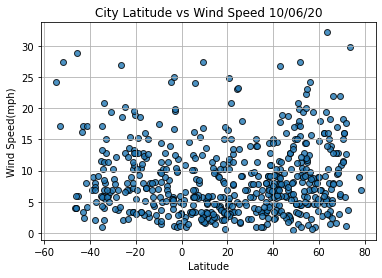

In [48]:
# Build the scatter plot for latitude vs Wind Speed.
plt.scatter(lats,
           wind_speed, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [77]:
# Import linear regression from Scipy stats module.
from scipy.stats import linregress

In [78]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err)= linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [79]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

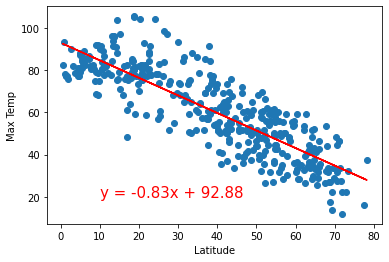

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (10,20) )

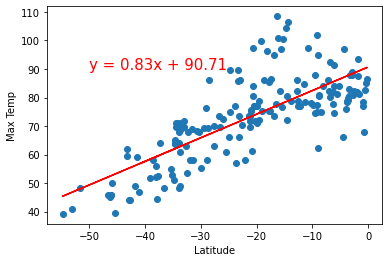

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))


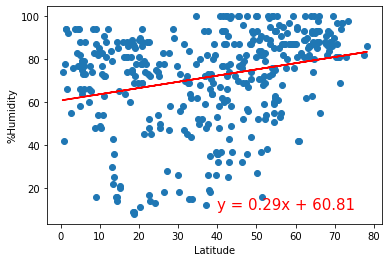

In [95]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Humidity', '%Humidity', (40,10))

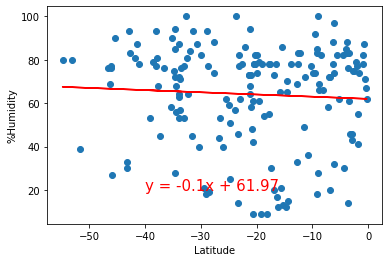

In [99]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Humidity', '%Humidity', (-40,20))

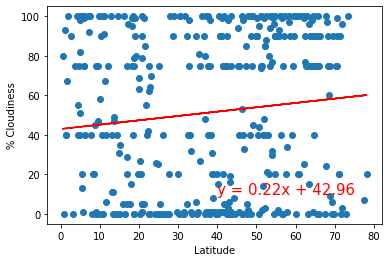

In [102]:
# # Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (40,10))

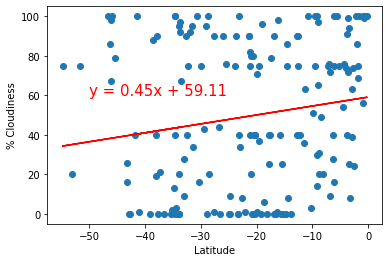

In [110]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-50,60))

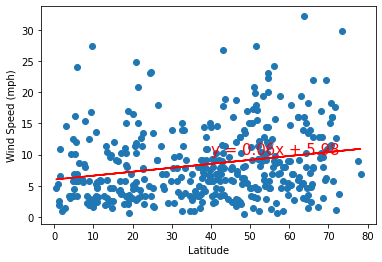

In [105]:
# # Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (40,10))

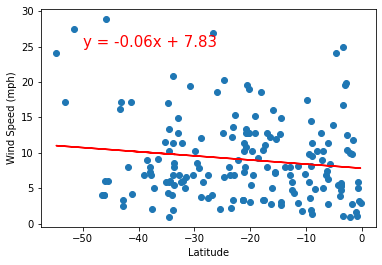

In [109]:
# # Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (-50,25))